In [200]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns

In [201]:
btc_df = pd.read_csv('Binance_BTCUSDT_d.csv', usecols=['date','close'])
btc_date_df = pd.read_csv('Binance_BTCUSDT_d.csv', usecols=['date'])
btc_closePrice_df = pd.read_csv('Binance_BTCUSDT_d.csv', usecols=['close'])

In [202]:
ada_df = pd.read_csv('Binance_ADAUSDT_d.csv', usecols=['date','close'])
ada_date_df = pd.read_csv('Binance_ADAUSDT_d.csv', usecols=['date'])
ada_closePrice_df = pd.read_csv('Binance_ADAUSDT_d.csv', usecols=['close'])

In [203]:
def Reverse(lst): 
    new_lst = lst[::-1] 
    return new_lst 

In [204]:
btcDateList = btc_date_df.values.tolist()
delistBtcDateList = []

for i in range (0, len(btcDateList)):
    delistBtcDateList.append(btcDateList[i][0].split(' ')[0])

formatBtcDateList = Reverse([dt.datetime.strptime(d,'%m/%d/%Y').date() for d in delistBtcDateList])
btcClosePriceList = Reverse(btc_closePrice_df.values.astype(float).tolist())
# print(btcClosePriceList[0][0])

adaDateList = ada_date_df.index.tolist()
adaClosePriceList = Reverse(ada_closePrice_df.values.tolist())

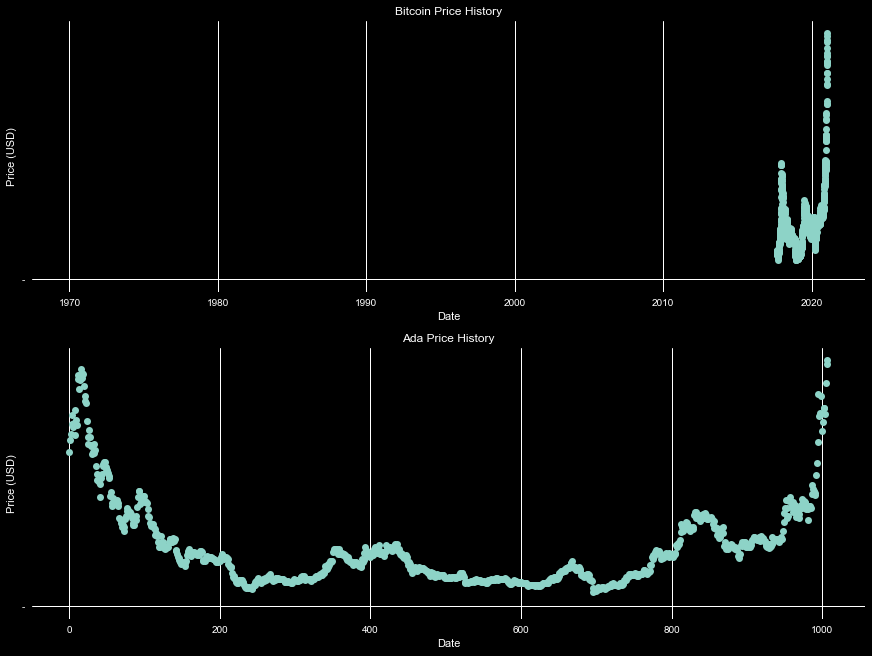

In [205]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,9

#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())

fig, axs = plt.subplots(2, 1, constrained_layout=True)

axs[0].plot(formatBtcDateList, btcClosePriceList, 'o', '-')
axs[0].set_title('Bitcoin Price History')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price (USD)')
## fig.suptitle('This is a somewhat long figure title', fontsize=16)

axs[1].plot(adaDateList, adaClosePriceList, 'o', '-')
axs[1].set_title('Ada Price History')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price (USD)')

plt.show()

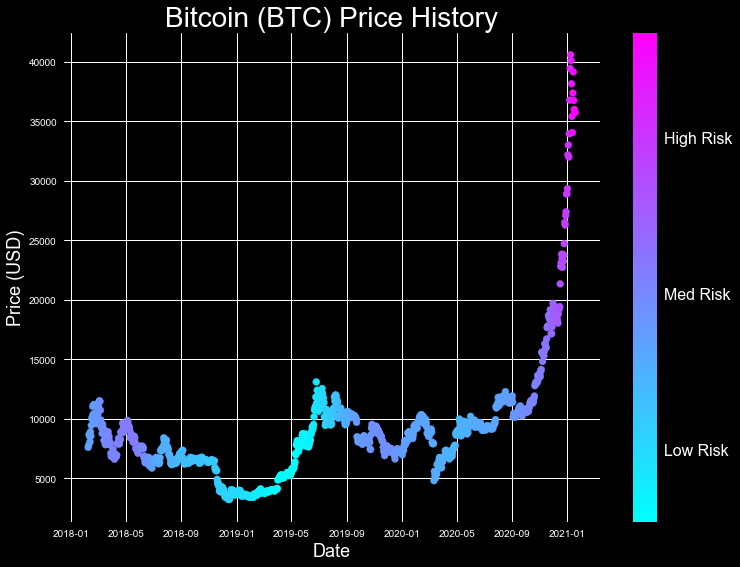

<Figure size 864x648 with 0 Axes>

In [206]:
# plotting the points   
colorList = []
for i in range (0, len(btcDateList)):
    colorList.append(i)

ma175risk = []

for i in range (0, 175):
    ma175risk.append(i)

for i in range (175, len(btcClosePriceList)):
    # calculate average of previous 175 values
    movingAvg_sum = 0
    for j in range (0, 175):
        movingAvg_sum = movingAvg_sum + int(btcClosePriceList[i-j][0])

    movingAvg = movingAvg_sum/175
    ma175risk.append(movingAvg)

for i in range (0,175):
    formatBtcDateList.pop(0)
    btcClosePriceList.pop(0)
    ma175risk.pop(0)

plt.style.use('dark_background')
plt.scatter(formatBtcDateList, btcClosePriceList, c = ma175risk, cmap = 'cool')
    
# naming the x axis  
plt.xlabel('Date', fontsize = 18)  
# naming the y axis  
plt.ylabel('Price (USD)', fontsize = 18)  
    
# giving a title to my graph  
plt.title('Bitcoin (BTC) Price History', fontsize = 28)  
    
# function to show the plot
cbar = plt.colorbar()
cbar.ax.set_yticklabels(['Low Risk','','Med Risk','','High Risk'], fontsize = 16)
plt.show()
plt.savefig('btcTest.png', dpi=600)


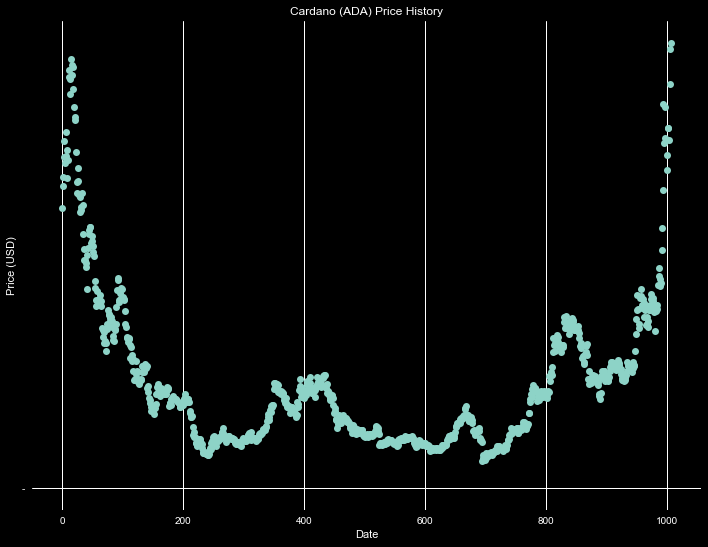

<Figure size 864x648 with 0 Axes>

In [207]:
# plotting the points   
plt.plot(adaDateList, adaClosePriceList, 'o', '-')
    
# naming the x axis  
plt.xlabel('Date')  
# naming the y axis  
plt.ylabel('Price (USD)')  
    
# giving a title to my graph  
plt.title('Cardano (ADA) Price History')  
    
# function to show the plot  
plt.show()
plt.savefig('adaTest.png', dpi=600)